# 분류 모델의 분류 성능 평가

- 분류문제는 회귀 분석과 달리 다양한 성능평가 기준이 필요함

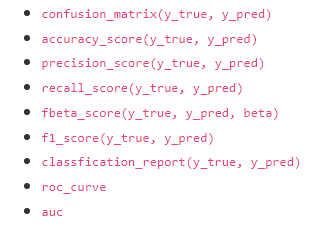

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\PC\anaconda3\envs\vmconda\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\PC\anaconda3\envs\vmconda\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
C:\Users\PC\anaconda3\envs\vmconda\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
np.random.seed(2021)

### Breast Cancer 종양의 양성(benign)/음성(malignmant) 구분

### 1.1 Data Load

In [3]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [4]:
dir(cancer)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [6]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

- radius : 반경
- txture : 질감
- perimeter : 둘레
- area : 면적
- smoothness : 매끄러움
- compatchness :조그한 정도
- concavity : 오목함
- concave points: 오목함 점의 수
- symmetry : 대칭
- fractal dimension : 프렉탈 차원

### 양성(0): malignant, 음성(1) : benign

ddata = cancer[

In [7]:
data, target = cancer['data'], cancer['target']

print(data[0], target[0])

[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01] 0


### 1-2. Data EDA

In [8]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [9]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
df.shape

(569, 30)

In [11]:
# 양성과 음성의 비율

pd.Series(target).value_counts()

1    357
0    212
dtype: int64

(array([212.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 357.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

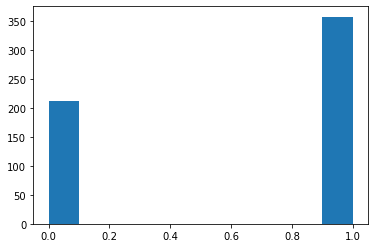

In [12]:
plt.hist(target)

Text(0, 0.5, 'target')

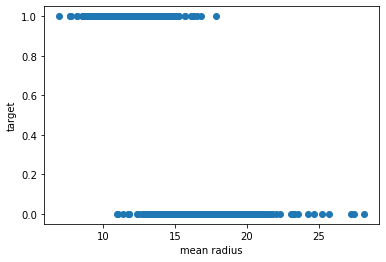

In [13]:
# mean radius와 target(정답) 간의 상관관계 plot 그려보기

plt.scatter(x=data[:,0], y=target)
plt.xlabel('mean radius')
plt.ylabel('target')

-> mean radius가 클 경우 음성

### 1-3. Data Split

In [14]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(data, target, train_size=0.7, random_state=2021)


In [15]:
print(train_data.shape, test_data.shape)

(398, 30) (171, 30)


### 2. Logistic Regression 전에 Linear Regression 적용해보기

In [16]:
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()

In [17]:
#학습

linear_regressor.fit(train_data, train_target)

LinearRegression()

In [18]:
# 예측

train_pred = linear_regressor.predict(train_data)
test_pred = linear_regressor.predict(test_data)

In [19]:
train_pred[:10]

array([ 0.65079698, -0.33739828,  0.76995559,  1.07473181,  0.98981797,
       -0.14066351,  0.91330917,  0.56950769,  1.12592692,  1.08459606])

-> 예측 결과는 0~1 사이를 벗어난 예측값들이 보임

### 2-1. 시각화

- mean_radius의 값의 변화에 따른 예측 결과 시각화

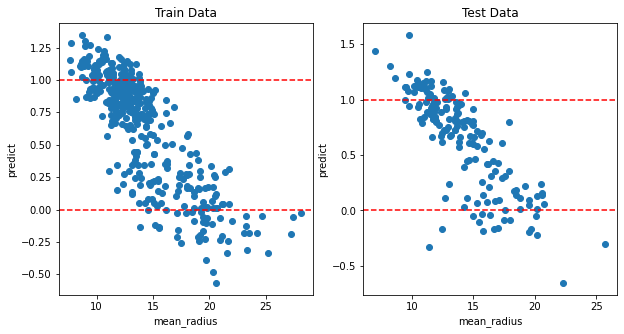

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

preds = [('Train', train_data, train_pred), ('Test', test_data, test_pred)]

for idx, (name, d, pred) in enumerate(preds):
    ax= axes[idx]
    ax.scatter(x=d[:,0], y=pred)
    ax.axhline(0, color='red', linestyle='--')
    ax.axhline(1, color='red', linestyle='--')
    ax.set_xlabel('mean_radius')
    ax.set_ylabel('predict')
    ax.set_title(f"{name} Data")

### 2-2. 평가하기

- Linear Regression의 성능을 측정하기 위해, 우선 예측값을 0과 1로 변환시켜주어야 함
- Youden's Index 이용하여 Best Threshold를 찾은 후 0과 1로 변화시킨 후 정확도를 봄

In [21]:
from sklearn.metrics import auc, roc_curve

In [22]:
fpr, tpr, threshold = roc_curve(train_target, train_pred)
auroc = auc(fpr, tpr)

In [23]:
fpr

array([0.        , 0.        , 0.        , 0.00675676, 0.00675676,
       0.01351351, 0.01351351, 0.02027027, 0.02027027, 0.02702703,
       0.02702703, 0.05405405, 0.05405405, 0.10810811, 0.10810811,
       1.        ])

In [24]:
tpr

array([0.   , 0.004, 0.86 , 0.86 , 0.928, 0.928, 0.98 , 0.98 , 0.988,
       0.988, 0.992, 0.992, 0.996, 0.996, 1.   , 1.   ])

In [25]:
threshold

array([ 2.3431729 ,  1.3431729 ,  0.74268219,  0.74137999,  0.69609319,
        0.68867913,  0.63316544,  0.62480986,  0.58612053,  0.58042965,
        0.57594808,  0.55461919,  0.53720045,  0.44439165,  0.44218128,
       -0.56296658])

#### AUROC

Text(0, 0.5, 'tpr')

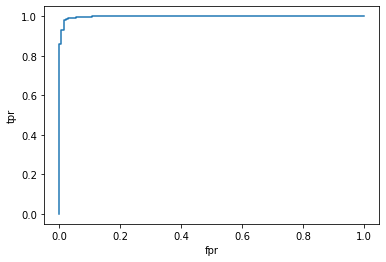

In [26]:
plt.plot(fpr, tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')

In [27]:
# auroc 값

print(f"AUROC : {auroc:.4f}")

AUROC : 0.9979


#### Best Threshold 계산

In [28]:
tpr-fpr

array([0.        , 0.004     , 0.86      , 0.85324324, 0.92124324,
       0.91448649, 0.96648649, 0.95972973, 0.96772973, 0.96097297,
       0.96497297, 0.93794595, 0.94194595, 0.88789189, 0.89189189,
       0.        ])

In [29]:
np.argmax(tpr-fpr)

8

In [30]:
J = tpr-fpr
idx = np.argmax(J)
best_thresh = threshold[idx]

print(f"Best Threshold is {best_thresh:.4f}")
print(f"Best Threshold's sensitivity is {tpr[idx]:.4f}")
print(f"Best Threshold's specficity is {1-fpr[idx]:.4f}")
print(f"Best Threshold's J is {J[idx]:.4f}")

Best Threshold is 0.5861
Best Threshold's sensitivity is 0.9880
Best Threshold's specficity is 0.9797
Best Threshold's J is 0.9677


- Best Threshold는 AUROC에서 직선이 가장 긴 곳

Text(0, 0.5, 'tpr')

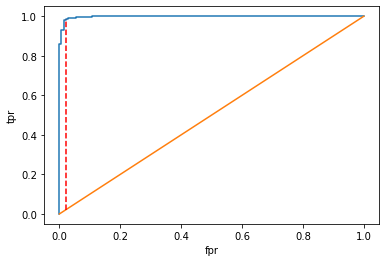

In [31]:
plt.plot(fpr, tpr)
plt.plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10))
plt.plot((fpr[idx], fpr[idx]), (fpr[idx], tpr[idx]), color="red", linestyle="--")
plt.xlabel("fpr")
plt.ylabel("tpr")

- 예측값에서의 Best Threshold 위치 

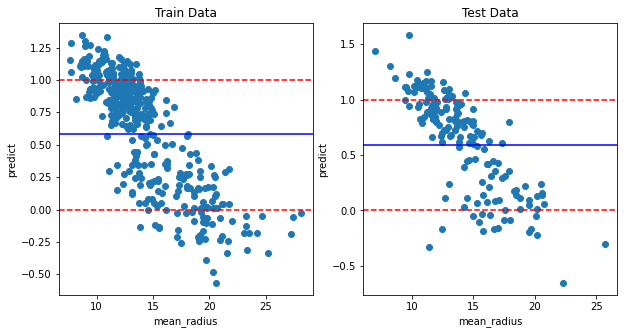

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

pred= [('Train', train_data, train_pred), ('Test', test_data, test_pred)]

for idx, (name, d, pred) in enumerate(preds):
    ax = axes[idx]
    ax.scatter(x=d[:,0], y=pred)
    ax.axhline(0, color='red', linestyle='--')
    ax.axhline(1, color='red', linestyle='--')
    ax.set_xlabel('mean_radius')
    ax.set_ylabel('predict')
    ax.set_title(f"{name} Data")
    ax.axhline(best_thresh, color='blue')

- Threshold로 예측값을 0,1로 변환한 후 정확도 보기

In [33]:
train_pred

array([ 0.65079698, -0.33739828,  0.76995559,  1.07473181,  0.98981797,
       -0.14066351,  0.91330917,  0.56950769,  1.12592692,  1.08459606,
        0.4943603 ,  1.13975842, -0.18693942,  0.96608847,  0.21771945,
        0.1171693 ,  0.84120251,  1.06447582,  0.79191884, -0.18055752,
        0.87215333,  0.74268219,  0.1757464 ,  0.85373267,  0.74809059,
        0.65750233, -0.38942924,  0.05389535,  1.10404132,  0.92968424,
        0.97343845, -0.00671976, -0.05875158,  1.05695736,  0.95024971,
       -0.10131778,  0.99364715, -0.24420346,  0.89097432,  0.83445985,
        0.90572241,  0.97150813,  0.34717662,  1.32982761,  0.65114308,
        1.04404063,  0.0631745 ,  0.22603765,  0.86344659,  0.00947845,
        0.01049084,  0.64188778,  0.93500279,  0.95343523,  1.05936231,
        0.564212  ,  0.18251248,  0.16654126, -0.02796361,  1.0315927 ,
        0.95794091,  0.1654442 , -0.02553562,  0.88120302,  1.0068701 ,
        1.15917096,  0.55461919,  1.18389725,  0.73654641,  0.14

In [34]:
best_thresh

0.5861205305266273

In [35]:
train_pred > best_thresh

array([ True, False,  True,  True,  True, False,  True, False,  True,
        True, False,  True, False,  True, False, False,  True,  True,
        True, False,  True,  True, False,  True,  True,  True, False,
       False,  True,  True,  True, False, False,  True,  True, False,
        True, False,  True,  True,  True,  True, False,  True,  True,
        True, False, False,  True, False, False,  True,  True,  True,
        True, False, False, False, False,  True,  True, False, False,
        True,  True,  True, False,  True,  True, False, False, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False, False,  True,  True, False,  True,  True,  True, False,
        True,  True,  True, False,  True,  True, False, False,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True,  True, False,  True, False,
        True,  True, False,  True,  True, False, False, False,  True,
        True, False,

In [36]:
train_pred_label = list(map(int, (train_pred > best_thresh)))
test_pred_label = list(map(int, (test_pred > best_thresh)))

In [37]:
from sklearn.metrics import accuracy_score

linear_train_accuracy = accuracy_score(train_target, train_pred_label)
linear_test_accuracy = accuracy_score(test_target, test_pred_label)

In [38]:
print(f"Train accuracy is : {linear_train_accuracy:.2f}")
print(f"Test accuracy is : {linear_test_accuracy:.2f}")

Train accuracy is : 0.98
Test accuracy is : 0.96


### 3. Logistic Regrssion

#### 3-1. Scaling

- Logistic Regression은 학습하기 전에 학습 시킬 데이터를 정규화함
- Logistic Regression의 exp은 값이 클수록 overflow 발생할 수 있음

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()

- 정규화는 항상 train data를 이용해 학습하고, valid, test 데이터를 변환해야함
- 모든 데이터를 한번에 학습할 경우 본 적 없는 vaild data의 평균과 분산을 반영하여 overfitting이 일어날 수 있음

In [41]:
scaler.fit(train_data)

StandardScaler()

In [42]:
# 학습된 scaler 로 train/test 변환

scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [43]:
train_data[0]

array([1.130e+01, 1.819e+01, 7.393e+01, 3.894e+02, 9.592e-02, 1.325e-01,
       1.548e-01, 2.854e-02, 2.054e-01, 7.669e-02, 2.428e-01, 1.642e+00,
       2.369e+00, 1.639e+01, 6.663e-03, 5.914e-02, 8.880e-02, 1.314e-02,
       1.995e-02, 8.675e-03, 1.258e+01, 2.796e+01, 8.716e+01, 4.729e+02,
       1.347e-01, 4.848e-01, 7.436e-01, 1.218e-01, 3.308e-01, 1.297e-01])

In [44]:
scaled_train_data[0]

array([-0.77241528, -0.25350148, -0.71766034, -0.72713135, -0.05609214,
        0.52832818,  0.80418063, -0.54281688,  0.8826752 ,  1.92363784,
       -0.56190665,  0.82998234, -0.22721273, -0.4934605 , -0.1485608 ,
        1.83202549,  1.75089411,  0.22238033, -0.03320069,  1.67142344,
       -0.74402208,  0.36363441, -0.58496884, -0.70201562,  0.06028267,
        1.48259627,  2.23558836,  0.09272995,  0.71316397,  2.55107451])

#### 3.2 학습

In [45]:
from sklearn.linear_model import LogisticRegression

logit_regressor = LogisticRegression()

In [46]:
logit_regressor.fit(scaled_train_data, train_target)

LogisticRegression()

#### 3.3 예측

- Classification 모델의 경우 `(1) predict` : 어떤 class로 분류할 지, `(2) predict_proba` : 각 class에 속할 확률

In [47]:
train_pred = logit_regressor.predict(scaled_train_data)
test_pred = logit_regressor.predict(scaled_test_data)

In [48]:
train_pred[:10]

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 1])

In [49]:
train_pred_logit = logit_regressor.predict_proba(scaled_train_data)
test_pred_logit = logit_regressor.predict_proba(scaled_test_data)

In [50]:
train_pred_logit[:10]

array([[9.77486880e-03, 9.90225131e-01],
       [9.99999999e-01, 1.10444571e-09],
       [2.00315051e-02, 9.79968495e-01],
       [1.74273407e-06, 9.99998257e-01],
       [4.94023919e-04, 9.99505976e-01],
       [9.99999933e-01, 6.70359495e-08],
       [2.92533805e-04, 9.99707466e-01],
       [8.26176477e-01, 1.73823523e-01],
       [1.33303137e-04, 9.99866697e-01],
       [5.72177528e-05, 9.99942782e-01]])

In [51]:
train_pred_logit[0]

array([0.00977487, 0.99022513])

-> 두 번째 클래스에 속할 확률이 더 큼

#### 3.4 평가

- 데이터의 AUROC를 계산하기 위해서는 1의 클래스로 분류될 확률 하나만 필요함
- 1에 속할 확률만 남김

In [52]:
train_pred_logit = train_pred_logit[:, 1]
test_pred_logit = test_pred_logit[:, 1]

In [53]:
train_pred_logit[0]

0.9902251312004193

In [54]:
from sklearn.metrics import auc, roc_curve

fpr, tpr, threshold = roc_curve(train_target, train_pred_logit)
auroc = auc(fpr, tpr)

Text(0, 0.5, 'tpr')

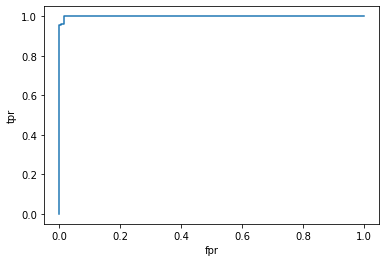

In [55]:
plt.plot(fpr, tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')

In [56]:
print(f"AUROC : {auroc:.4f}")

AUROC : 0.9994


In [57]:
J = tpr- fpr
idx = np.argmax(J)
best_thresh = threshold[idx]

print(f"Best Threshold is {best_thresh:.4f}")
print(f"Best Threshold's sensitivity is {tpr[idx]:.4f}")
print(f"Best Threshold's specificity is {1-fpr[idx]:.4f}")
print(f"Best Threshold's J is {J[idx]:.4f}")

Best Threshold is 0.4433
Best Threshold's sensitivity is 1.0000
Best Threshold's specificity is 0.9865
Best Threshold's J is 0.9865


Text(0, 0.5, 'tpr')

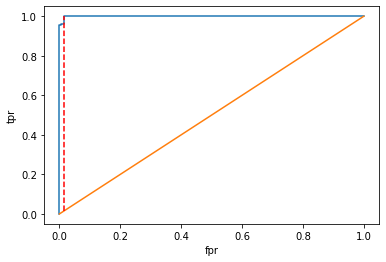

In [58]:
plt.plot(fpr, tpr)
plt.plot(np.linspace(0,1, 10), np.linspace(0,1,10))
plt.plot((fpr[idx],fpr[idx]), (fpr[idx], tpr[idx]), color= 'red', linestyle='--')
plt.xlabel('fpr')
plt.ylabel('tpr')

Text(0, 0.5, 'probability')

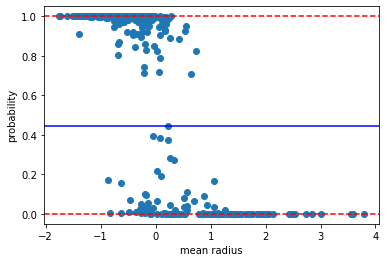

In [59]:
plt.scatter(x=scaled_train_data[:,0], y=train_pred_logit)
plt.axhline(best_thresh, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.axhline(1, color='red', linestyle='--')
plt.xlabel('mean radius')
plt.ylabel('probability')

- Threshold로 예측값을 0,1로 변환한 후 정확도 확인

In [60]:
train_pred_label = list(map(int, (train_pred_logit > best_thresh)))
test_pred_label =  list(map(int, (test_pred_logit > best_thresh)))

In [61]:
proba_train_accuracy = accuracy_score(train_target, train_pred_label)
proba_test_accuracy = accuracy_score(test_target, test_pred_label)

In [62]:
print(f"Train accuracy is : {proba_train_accuracy:.2f}")
print(f"Test accuracy is : {proba_test_accuracy:.2f}")

Train accuracy is : 0.99
Test accuracy is : 0.96


- predict의 결과값

In [63]:
train_accuracy = accuracy_score(train_target, train_pred)
test_accuracy = accuracy_score(test_target, test_pred)

In [64]:
print(f"Train accuracy is : {train_accuracy:.2f}")
print(f"Test accurarcy is : {test_accuracy:.2f}")

Train accuracy is : 0.99
Test accurarcy is : 0.97


- `predict_proba`의 bset_threshold로 계산한 결과와 `predict`로 계산한 결과가 다름
- 이는 두 0과 1로 예측하는 방법이 다르기 때문임. (0.49, 0.51)의 확률시 predict는 class 1의 확률에 속할 확률이 커서 1로 분류함
- 하지만 best_threshold가 0.52라면 predict_proba의 경우 class를 0으로 분류함

### 마무리

In [65]:
print(f"Linear Regression Test Accuracy: {linear_test_accuracy:.2f}")
print(f"Logistic Regression predict_proba Test Accuracy: {proba_test_accuracy:.2f}")
print(f"Logistic Regression predict Test Accuracy : {test_accuracy:.2f}")

Linear Regression Test Accuracy: 0.96
Logistic Regression predict_proba Test Accuracy: 0.96
Logistic Regression predict Test Accuracy : 0.97
